In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv("C:\\Users\\Mohammed Ahmed\\OneDrive\\Desktop\\prognosispulseapp\\project testing by adnan\\Datasets\\osteoporosis.csv")
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [3]:
#checking the shape of the dataset
df.shape

(1958, 16)

In [4]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [5]:
#columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

#missing value percentage
print("Missing value percentage")
for column in columns_with_missing_values:
    print(column,":",df[column].isnull().sum()/df.shape[0]*100)

Missing value percentage
Alcohol Consumption : 50.45965270684371
Medical Conditions : 33.04392236976506
Medications : 50.30643513789581


In [6]:
#replace missing values with "None"
df.fillna("None",inplace=True)

In [7]:
df = df.drop(['Id'], axis=1)

In [8]:
#value counts of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(df[column].value_counts())

Gender
Male      992
Female    966
Name: count, dtype: int64
Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64
Family History
No     998
Yes    960
Name: count, dtype: int64
Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64
Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64
Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64
Vitamin D Intake
Sufficient      1011
Insufficient     947
Name: count, dtype: int64
Physical Activity
Active       1021
Sedentary     937
Name: count, dtype: int64
Smoking
Yes    982
No     976
Name: count, dtype: int64
Alcohol Consumption
None        988
Moderate    970
Name: count, dtype: int64
Medical Conditions
Hyperthyroidism         678
None                    647
Rheumatoid Arthritis    633
Name: count, dtype: int64
Medications
None               985
Corticosteroids    973
Name: count, dtype: int64
Prior Fract

In [9]:
df.describe()

,Age,Osteoporosis
count,1958.000000,1958.000000
mean,39.101124,0.500000
std,21.355424,0.500128
min,18.000000,0.000000
25%,21.000000,0.000000
50%,32.000000,0.500000
75%,53.000000,1.000000
max,90.000000,1.000000


In [10]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


Text(0.5, 1.0, 'Osteoporosis')

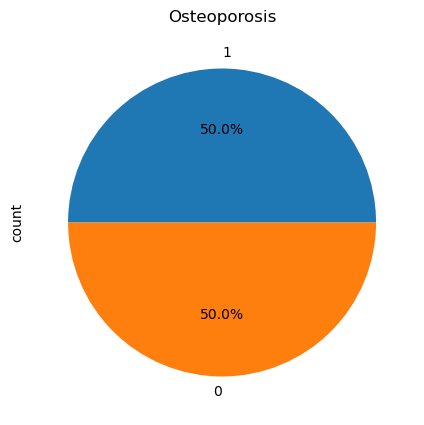

In [11]:
#pie chart for the target variable (Osteoporosis)
plt.figure(figsize=(5,5))
df['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Osteoporosis')

Text(0.5, 1.0, 'Osteoporosis by Age')

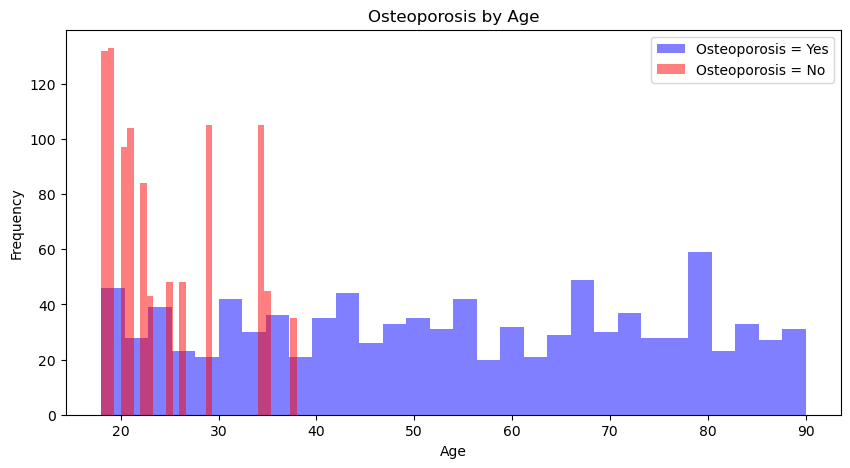

In [12]:
#two layer histogram for the Age and Osteoporosis
plt.figure(figsize=(10,5))
df[df['Osteoporosis']==1]['Age'].plot.hist(bins=30, alpha=0.5, color='blue', label='Osteoporosis = Yes')
df[df['Osteoporosis']==0]['Age'].plot.hist(bins=30, alpha=0.5, color='red', label='Osteoporosis = No')

#legends and title
plt.legend()
plt.xlabel('Age')
plt.title('Osteoporosis by Age')

Text(0.5, 1.0, 'Gender vs Osteoporosis')

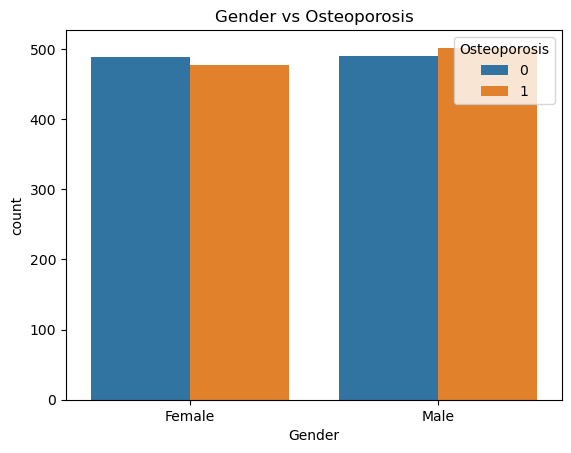

In [13]:
sns.countplot(x='Gender', data=df, hue='Osteoporosis').set_title('Gender vs Osteoporosis')

Text(0.5, 1.0, 'Hormonal changes and Osteoporosis')

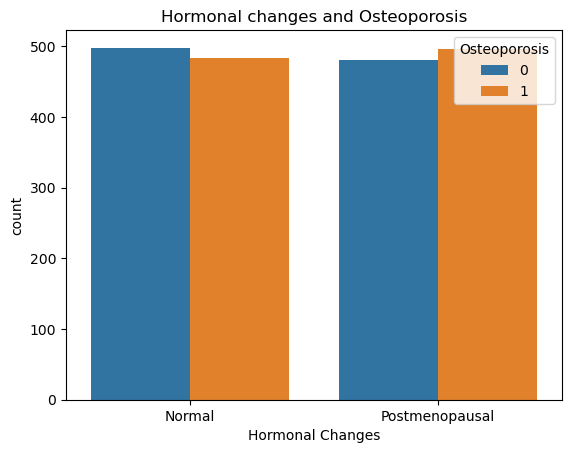

In [14]:
#hormonal changes and Osteoporosis
sns.countplot(x='Hormonal Changes',data=df,hue='Osteoporosis').set_title('Hormonal changes and Osteoporosis')

Text(0.5, 1.0, 'Family History and Osteoporosis')

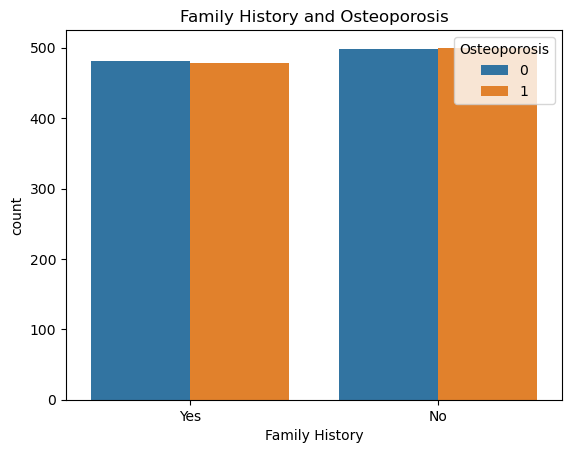

In [15]:
sns.countplot(x = "Family History", data = df, hue = "Osteoporosis").set_title("Family History and Osteoporosis")

Text(0.5, 1.0, 'Race/Ethnicity and Osteoporosis')

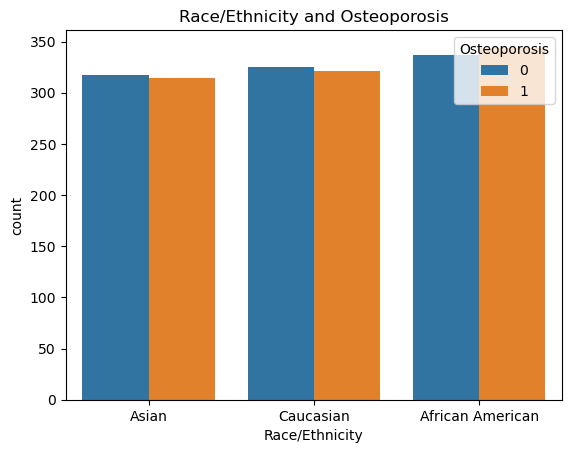

In [16]:
sns.countplot(x="Race/Ethnicity", data = df, hue = "Osteoporosis").set_title("Race/Ethnicity and Osteoporosis")

Text(0.5, 1.0, 'Body Weight and Osteoporosis')

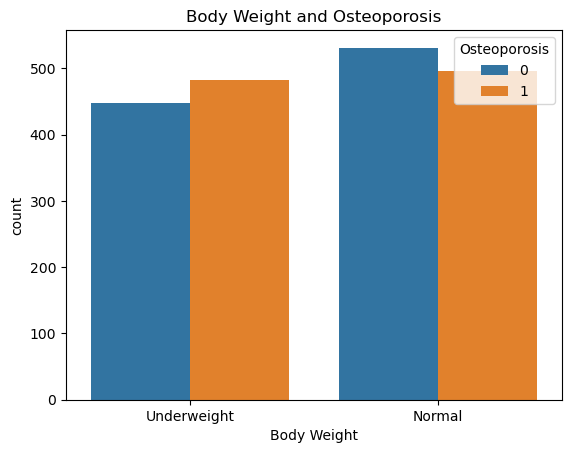

In [17]:
sns.countplot(x="Body Weight", data = df, hue = "Osteoporosis").set_title("Body Weight and Osteoporosis")

Text(0.5, 1.0, 'Vitamin D Intake and Osteoporosis')

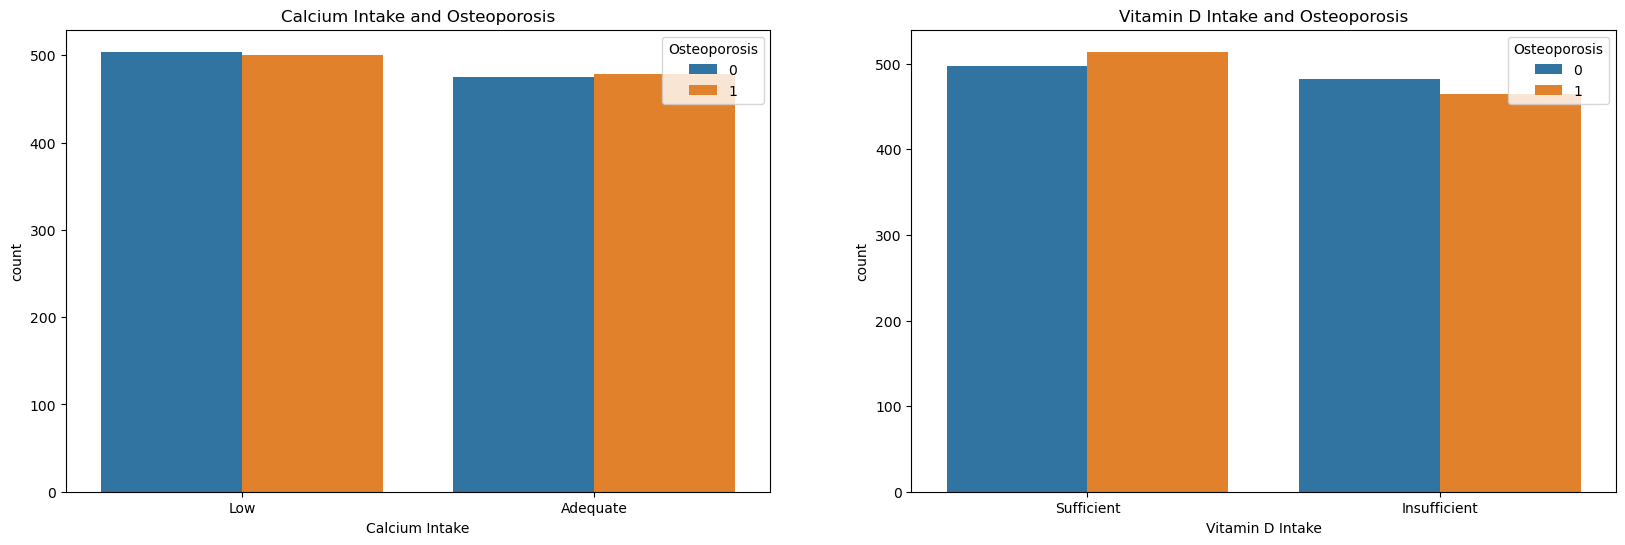

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(x='Calcium Intake', data=df, ax=ax[0], hue='Osteoporosis').set_title('Calcium Intake and Osteoporosis')
sns.countplot(x='Vitamin D Intake', data=df, ax=ax[1], hue='Osteoporosis').set_title('Vitamin D Intake and Osteoporosis')

Text(0.5, 1.0, 'Physical Activity and Osteoporosis')

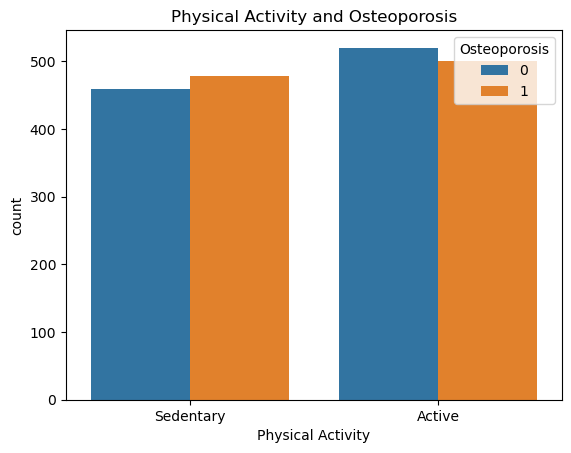

In [19]:
sns.countplot(x='Physical Activity', data=df, hue='Osteoporosis').set_title('Physical Activity and Osteoporosis')

Text(0.5, 1.0, 'Alcohol Consumption and Osteoporosis')

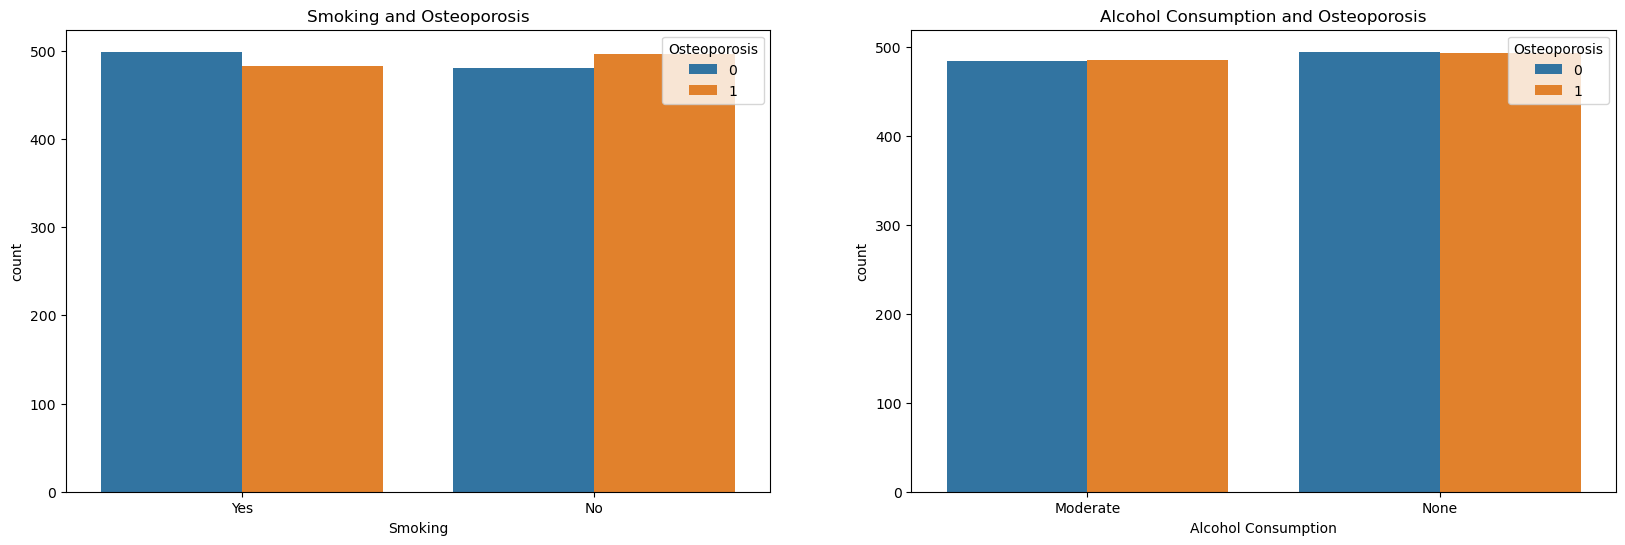

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(x='Smoking', data=df, ax=ax[0], hue='Osteoporosis').set_title('Smoking and Osteoporosis')
sns.countplot(x='Alcohol Consumption', data=df, ax=ax[1], hue='Osteoporosis').set_title('Alcohol Consumption and Osteoporosis')

Text(0.5, 1.0, 'Medications and Osteoporosis')

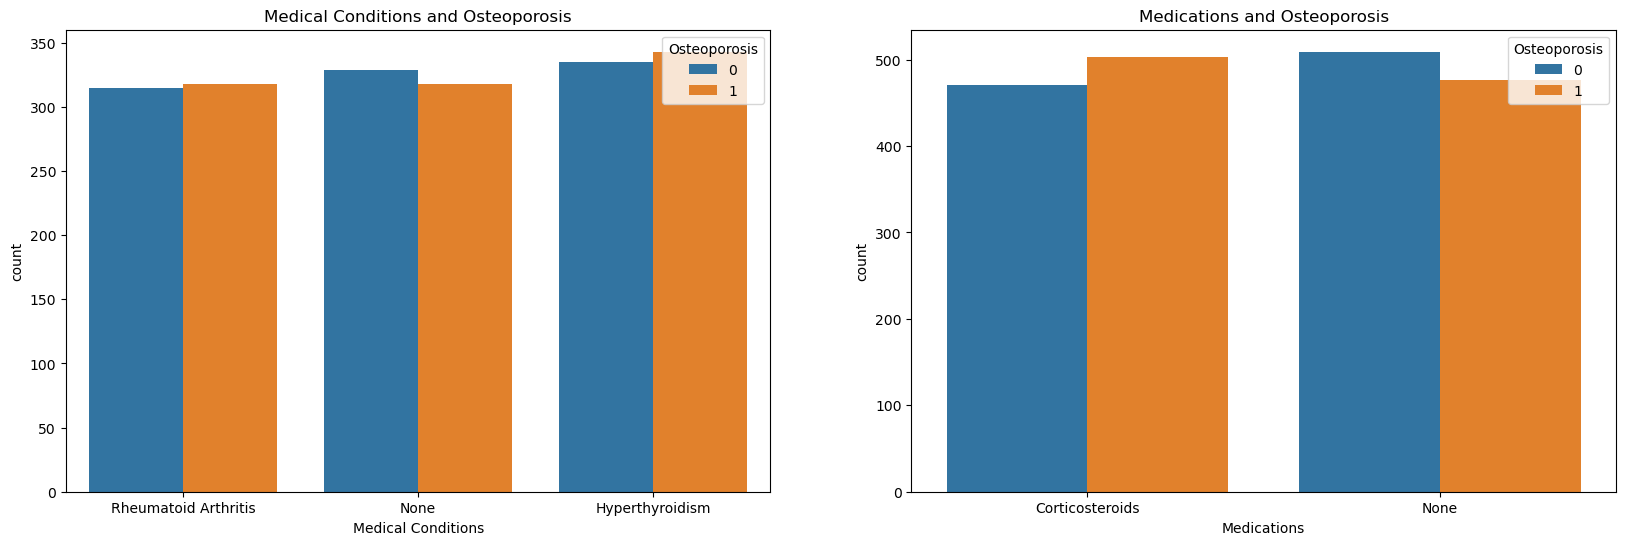

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(x='Medical Conditions', data=df, ax=ax[0], hue='Osteoporosis').set_title('Medical Conditions and Osteoporosis')
sns.countplot(x='Medications', data=df, ax=ax[1], hue='Osteoporosis').set_title('Medications and Osteoporosis')

In [22]:
#columns for label encoding
cols = df.select_dtypes(include=['object']).columns

#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
    print(col,":",df[col].unique())

Gender : [0 1]
Hormonal Changes : [0 1]
Family History : [1 0]
Race/Ethnicity : [1 2 0]
Body Weight : [1 0]
Calcium Intake : [1 0]
Vitamin D Intake : [1 0]
Physical Activity : [1 0]
Smoking : [1 0]
Alcohol Consumption : [0 1]
Medical Conditions : [2 1 0]
Medications : [0 1]
Prior Fractures : [1 0]


<Axes: >

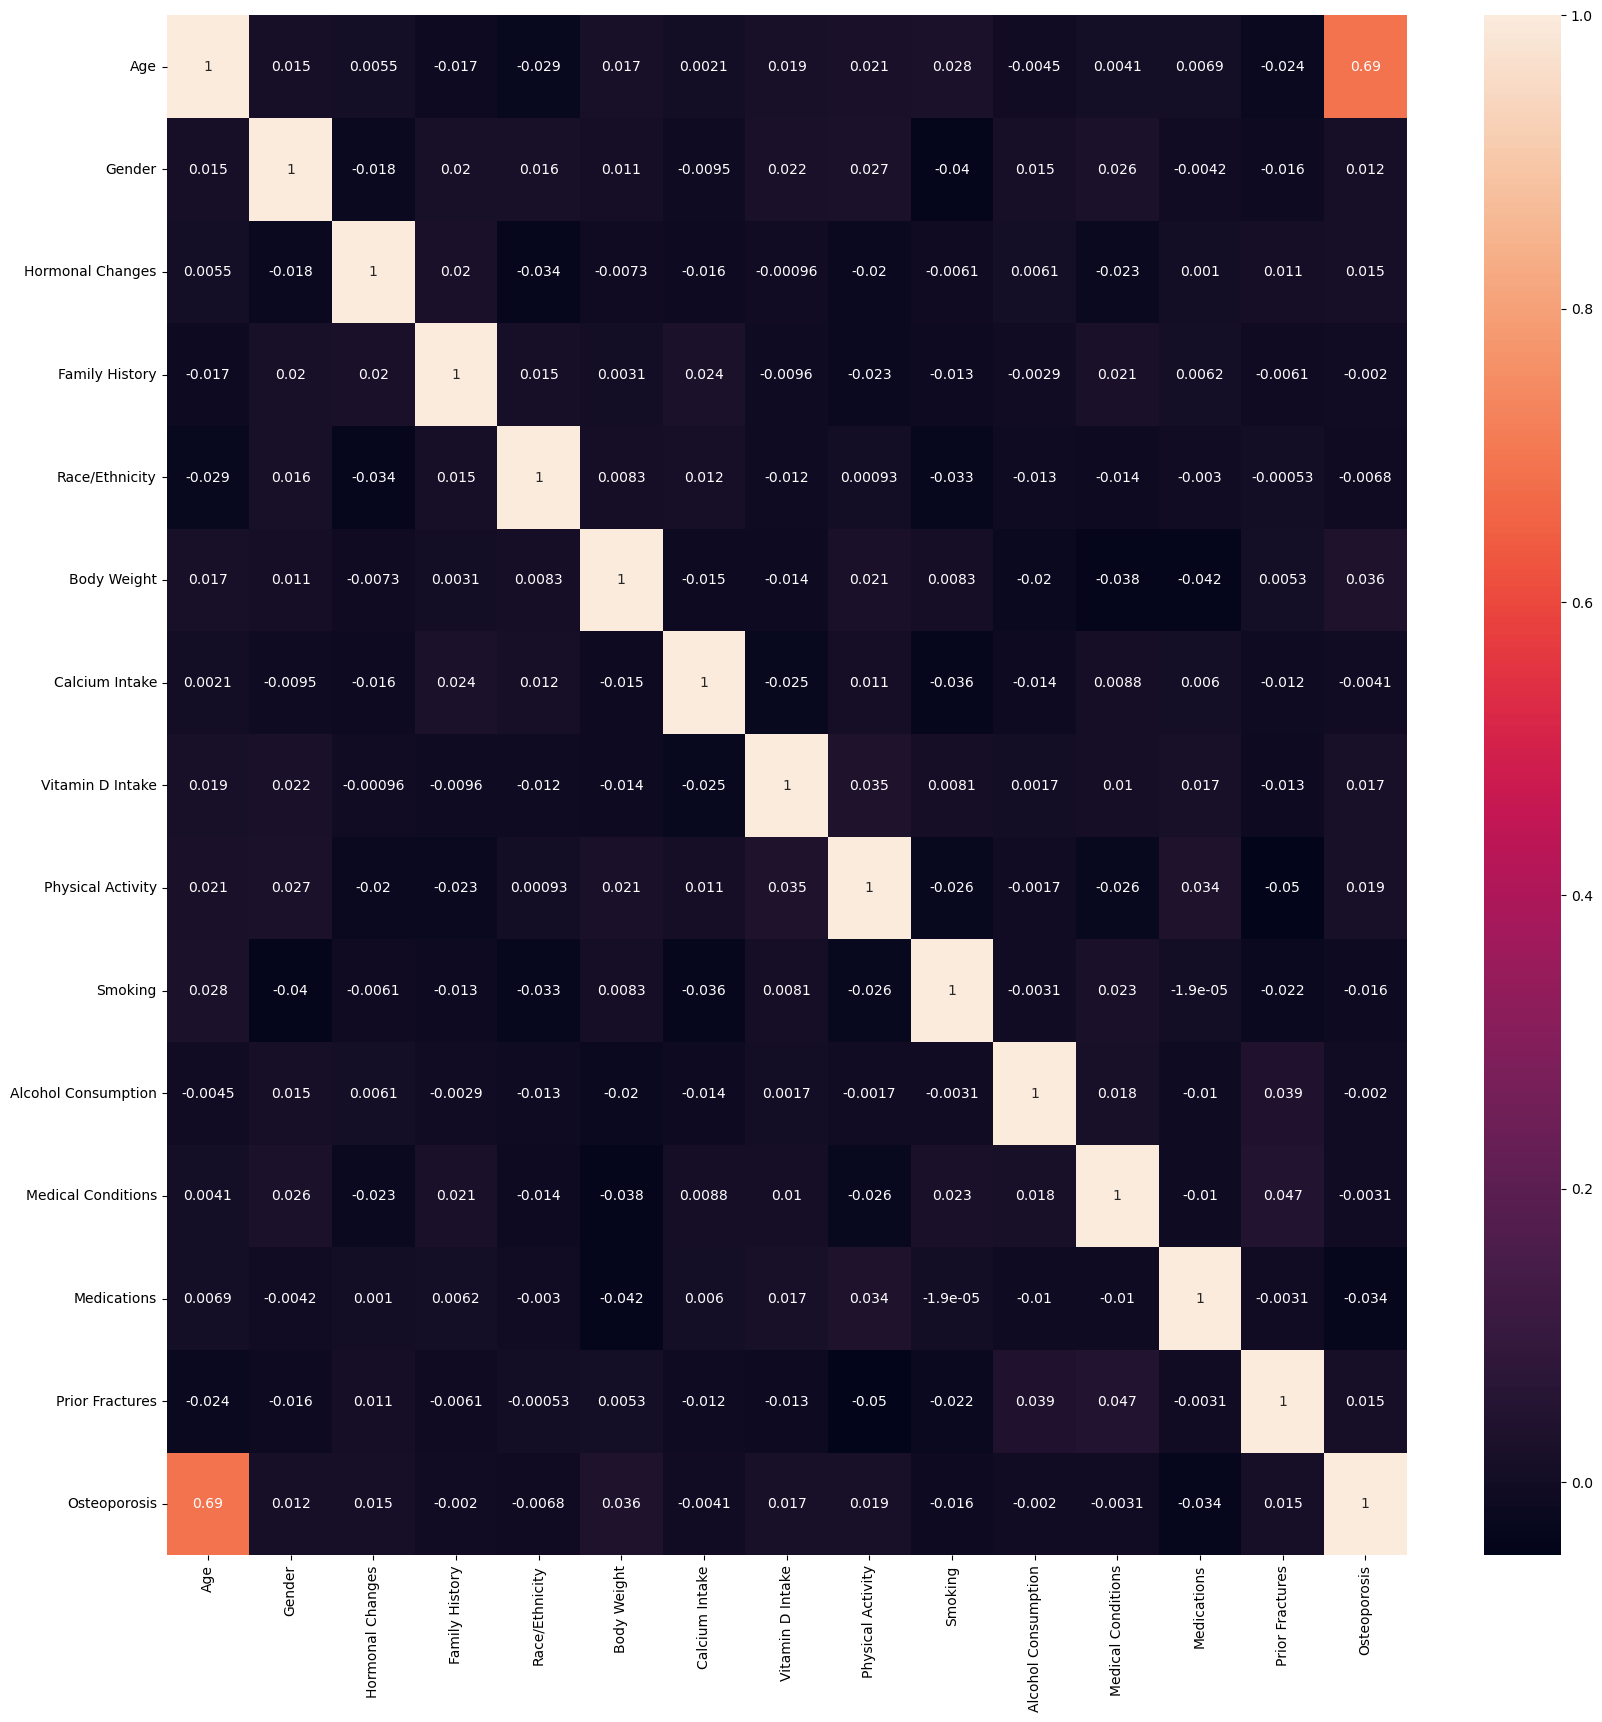

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Osteoporosis',axis=1), df['Osteoporosis'], test_size=0.30, random_state=101)

In [25]:
from sklearn.ensemble import RandomForestClassifier

#creating random forest object
rfc = RandomForestClassifier()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#creating random forest object
rfc = RandomForestClassifier()

#parameters for grid search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [2,5,10],
              'random_state': [0,42,101]}

#grid search object
grid = GridSearchCV(rfc, param_grid, refit=True, verbose=3, cv=5, n_jobs=-1)

#fitting the data
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [27]:
#random forest with best parameters
rfc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, min_samples_split=2, random_state=42)

#fitting the data
rfc.fit(X_train,y_train)

#training accuracy
print("Training accuracy:",rfc.score(X_train,y_train))

#prediction
rfc_pred = rfc.predict(X_test)

Training accuracy: 0.9401459854014599


In [28]:
input_data = (1,0,1,1,2,1,10,1,1,1,2,1,1,1,)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Osteoporosis Disease")

else:
  print("The Person has Osteoporosis")

[0]
The Person does not have Osteoporosis Disease


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
import pickle

In [30]:
filename = 'Osteoporosis_new.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [31]:
# loading the saved model
loaded_model = pickle.load(open('Osteoporosis_new.sav', 'rb'))

In [32]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
columns = df.columns
print(columns)


Index(['Age', 'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis'],
      dtype='object')


In [33]:
for column in df.columns:
    print(column)


Age
Gender
Hormonal Changes
Family History
Race/Ethnicity
Body Weight
Calcium Intake
Vitamin D Intake
Physical Activity
Smoking
Alcohol Consumption
Medical Conditions
Medications
Prior Fractures
Osteoporosis
